In [1]:
import nltk
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re  
import spacy
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
import seaborn as sns

# nltk.download('punkt')
# nltk.download('wordnet')
nlp = spacy.load('en_core_web_lg')

In [2]:
tweets = pd.read_csv("./data/dune_scrape_5000.csv")

In [3]:
tweets.head()

,User,Handle,PostDate,TweetText,ReplyCount,RetweetCount,LikeCount
0,Jess Dweck,@TheDweck,2021-11-03T19:23:53.000Z,Doing the Dune voice to get my wi-fi to work,12,26,374
1,macaroni and sleaze,@Jenny_Trout,2021-11-03T18:47:23.000Z,"no matter how you feel about dune, i think we ...",2,27,132
2,Matthew Yglesias,@mattyglesias,2021-11-03T17:55:55.000Z,Lots of Virginia Discourse on here but I'm pla...,10,3,185
3,Bandicoot,@crack_bandicoot,2021-11-03T17:51:58.000Z,Just came back from watching Dune at an IMAX a...,13,11,123
4,Brian Lynch,@BrianLynch,2021-11-03T17:39:23.000Z,Saw DUNE with JFK Jr. yesterday. We dug it. ...,3,2,107


In [4]:
all_sentences = []
for tweet in tweets['TweetText']:
    all_sentences.append(tweet)
#all_sentences

lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
       lines.append(w)


#print(lines)

In [5]:
lines2 = []
lines2 = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]


for word in lines:
    if word != '':
        lines2.append(word)


In [6]:
#This is stemming the words to their root
# The Snowball Stemmer requires that you pass a language parameter

s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))



In [7]:

stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words and re.search(r'[A-Za-z0-9]+', word):
        stem2.append(word)


In [8]:
tweet_words = pd.DataFrame(stem2)
tweet_words = tweet_words[0].value_counts()
del tweet_words['dune']


like                 875
movi                 828
watch                679
peopl                420
time                 419
read                 416
film                 403
im                   364
think                348
book                 346
love                 318
i'm                  316
new                  302
sand                 292
look                 291
villeneuv            289
realli               283
2                    278
year                 261
good                 255
becaus               251
dune.                249
know                 247
want                 246
onli                 242
star                 230
thing                229
trailer              229
deni                 215
come                 193
                    ... 
turn.”                 1
"dune:                 1
mvp).                  1
#insulatebritian       1
[the                   1
“patriarchy?           1
endgame,               1
29,                    1
“tran                  1


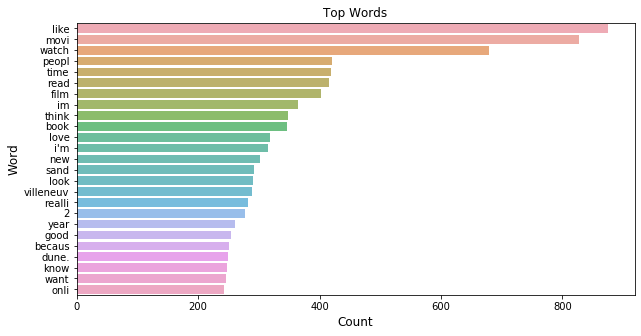

In [9]:

tweet_words = tweet_words[:25,]
plt.figure(figsize=(10,5))
sns.barplot(tweet_words.values, tweet_words.index, alpha=0.8)
plt.title('Top Words')
plt.ylabel('Word', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.show()

In [10]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df10 = pd.DataFrame(label, columns = ['Word','Entity'])

df10 = df10.where(df10['Entity'] == 'PERSON')

df11 = df10['Word'].value_counts()

del df11['┃']

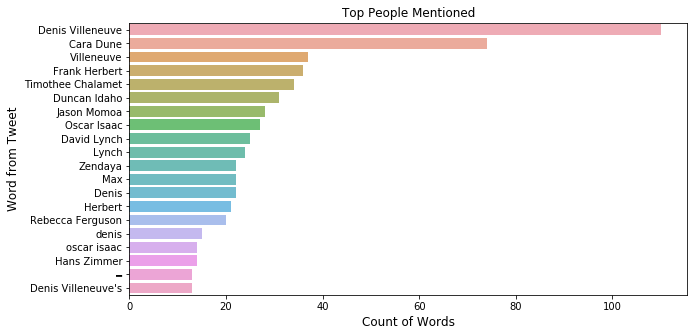

In [11]:

df = df11[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top People Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()
